In [1]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
data=pd.read_csv('abalone.csv',header=None,names = ['Sex','Length','Diameter',
                                                    'Height','Whole_weight','Shucked_weight',
                                                    'Viscera_weight','Shell_weight','Rings'])
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [4]:
data.shape

(4177, 9)

In [5]:
data1=data.loc[:,'Length':'Rings']
data1.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


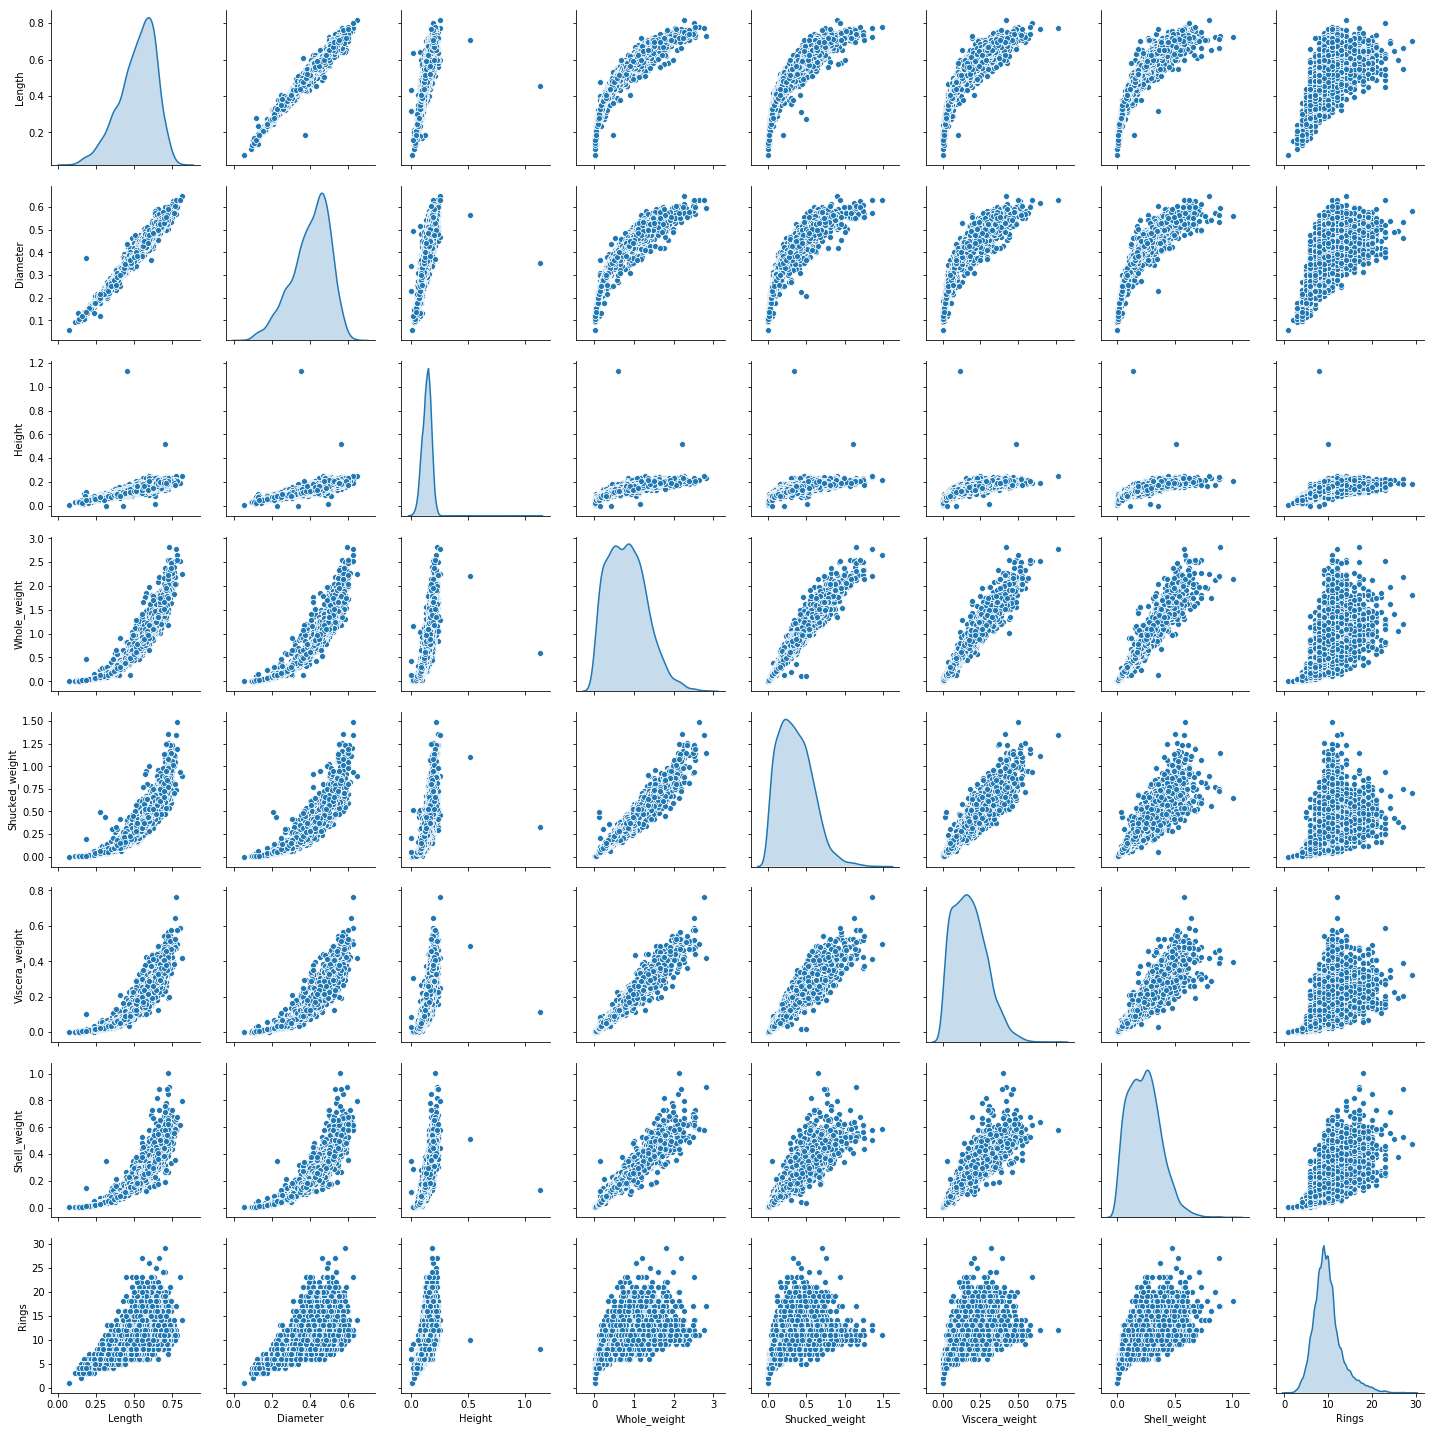

In [6]:
sns.pairplot(data1,diag_kind='kde')

In [7]:
dataz=data1.apply(zscore)
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


In [8]:
cluster_range=range(1,15)
cluster_error=[]
for num_cluster in cluster_range:
    model=KMeans(num_cluster)
    model.fit(dataz)
    cluster_error.append(model.inertia_)


In [9]:
labels=model.labels_
centroids=model.cluster_centers_

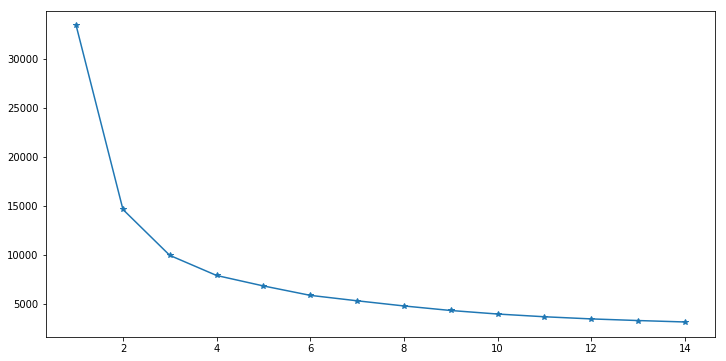

In [10]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_error,marker='*')

In [11]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)

In [12]:
kmeans.fit(dataz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [14]:
centroids=kmeans.cluster_centers_
centroids

array([[ 0.13570472,  0.13223651,  0.06955548, -0.08492905, -0.09047204,
        -0.0829803 , -0.06004439,  0.14255146],
       [-1.27709975, -1.27787282, -1.12085776, -1.13750326, -1.08408354,
        -1.11591049, -1.1283335 , -0.85717476],
       [ 1.03608988,  1.04187408,  0.98130211,  1.22176997,  1.17823769,
         1.19808871,  1.17676949,  0.62065252]])

In [15]:
type(centroids)

numpy.ndarray

In [16]:
centroids_data=pd.DataFrame(centroids,columns=list(dataz))

In [17]:
centroids_data

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.135705,0.132237,0.069555,-0.084929,-0.090472,-0.082980,-0.060044,0.142551
1,-1.277100,-1.277873,-1.120858,-1.137503,-1.084084,-1.115910,-1.128333,-0.857175
2,1.036090,1.041874,0.981302,1.221770,1.178238,1.198089,1.176769,0.620653


In [19]:
kmeans.labels_[:30]

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 0])

In [20]:
dataz['Class']=kmeans.labels_

In [21]:
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Class
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,0
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,0
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1


In [22]:
data1['class']=kmeans.labels_

In [23]:
data1.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [32]:
g0=data1[data1['class']==0]
g1=data1[data1['class']==1]
g2=data1[data1['class']==2]

In [33]:
g0.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,class
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.0
mean,0.540206,0.420936,0.142408,0.786761,0.339128,0.171398,0.230399,10.393683,0.0
std,0.045025,0.037322,0.017829,0.183744,0.096088,0.044877,0.056098,2.725725,0.0
min,0.405000,0.310000,0.015000,0.352500,0.113500,0.056500,0.099500,6.000000,0.0
25%,0.505000,0.390000,0.130000,0.631500,0.263500,0.137000,0.185000,9.000000,0.0
50%,0.540000,0.425000,0.140000,0.793000,0.332500,0.169000,0.230000,10.000000,0.0
75%,0.575000,0.450000,0.155000,0.931500,0.407000,0.204000,0.270000,11.000000,0.0
max,0.655000,0.525000,0.235000,1.256500,0.707000,0.311000,0.480000,23.000000,0.0


In [34]:
g1.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,class
count,1180.00000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.0
mean,0.37064,0.281081,0.092640,0.270990,0.118770,0.058289,0.081783,7.170339,1.0
std,0.07813,0.063377,0.022409,0.137169,0.066725,0.030415,0.041280,1.890730,0.0
min,0.07500,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.0
25%,0.32500,0.243750,0.080000,0.165875,0.067500,0.034500,0.050000,6.000000,1.0
50%,0.38500,0.290000,0.095000,0.268750,0.114250,0.057500,0.081000,7.000000,1.0
75%,0.43500,0.330000,0.110000,0.382250,0.165125,0.082000,0.114625,8.000000,1.0
max,0.50000,0.435000,0.160000,0.647500,0.495000,0.159000,0.350500,16.000000,1.0


In [35]:
g2.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,class
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.0
mean,0.648346,0.511213,0.180519,1.427255,0.620633,0.311823,0.402448,11.931373,2.0
std,0.043314,0.035939,0.034846,0.304738,0.160611,0.073666,0.096283,3.100950,0.0
min,0.455000,0.355000,0.125000,0.594000,0.300000,0.116000,0.133500,6.000000,2.0
25%,0.620000,0.485000,0.165000,1.205000,0.511500,0.259500,0.335000,10.000000,2.0
50%,0.645000,0.505000,0.175000,1.347500,0.592000,0.299250,0.384000,11.000000,2.0
75%,0.675000,0.530000,0.190000,1.578875,0.691000,0.352500,0.450000,13.000000,2.0
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.0


In [37]:
dataz['class']=kmeans.labels_

In [39]:
dataz.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Class,class
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,0,0
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,0,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,0,0
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1,1


In [40]:
g0=dataz[dataz['class']==0]
g1=dataz[dataz['class']==1]
g2=dataz[dataz['class']==2]

In [41]:
g0.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Class,class
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.0,1773.0
mean,0.135026,0.131566,0.069149,-0.085617,-0.091194,-0.083904,-0.060582,0.142689,0.0,0.0
std,0.374966,0.376122,0.426304,0.374736,0.432955,0.409458,0.403042,0.845505,0.0,0.0
min,-0.990952,-0.986428,-2.977291,-0.971268,-1.107829,-1.132229,-1.001041,-1.220208,0.0,0.0
25%,-0.158164,-0.180204,-0.227545,-0.402264,-0.431959,-0.397748,-0.386755,-0.289624,0.0,0.0
50%,0.133312,0.172519,0.011563,-0.072894,-0.121059,-0.105780,-0.063446,0.020571,0.0,0.0
75%,0.424788,0.424464,0.370226,0.209569,0.214622,0.213560,0.223939,0.330765,0.0,0.0
max,1.091018,1.180300,2.283092,0.872387,1.566361,1.189827,1.732711,4.053100,0.0,0.0
